In [2]:
# Import necessary libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Manually set NeurIPS 2023 style
plt.rcParams.update({
    'font.size': 14,  # Base font size
    'axes.labelsize': 14,  # Font size for axis labels
    'axes.titlesize': 14,  # Font size for axes title
    'legend.fontsize': 12,  # Font size for legend
    'xtick.labelsize': 12,  # Font size for x ticks
    'ytick.labelsize': 12,  # Font size for y ticks
    'figure.figsize': (12, 6),  # Figure size for NeurIPS
    'figure.constrained_layout.use': True,  # Use constrained layout
    'savefig.bbox': 'tight',  # Save figure with tight bounding box
    'savefig.pad_inches': 0.015,  # Padding when saving
    'lines.linewidth': 0.8,  # Line width
    'axes.linewidth': 0.5,  # Axes line width
    'grid.linewidth': 0.5,  # Grid line width
    'xtick.major.width': 0.5,  # Major tick width
    'ytick.major.width': 0.5,  # Major tick width
    'legend.edgecolor': 'inherit',  # Inherit edge color for legend
    'axes.axisbelow': True,  # Place grid lines below the plot elements
    'text.usetex': False,  # Disable LaTeX formatting
    'font.family': 'serif',  # Use serif font
    'font.serif': ['Times'],  # Use Times font
    'mathtext.fontset': 'stix',  # Use STIX math font
    'mathtext.rm': 'Times',  # Roman font for math text
    'mathtext.it': 'Times:italic',  # Italic math font
    'mathtext.bf': 'Times:bold',  # Bold math font
})

company_category_map = {
    "MediaTek Inc., Taiwan": "big",
    "Megvii Technology": "scaleup",
    "Microsoft": "big",
    "Microsoft AI for Earth": "mid-size",
    "Microsoft Research": "big",
    "Microsoft Research, Beijing": "big",
    "Microsoft Research, India": "big",
    "NAVER LABS Europe": "mid-size",
    "NEC Corporation": "big",
    "NEC Corporation, Japan": "big",
    "NEC Laboratories America": "mid-size",
    "NEC Labs America": "mid-size",
    "NVIDIA": "big",
    "NVIDIA, SenseTime": "big",
    "Nokia Technologies, Espoo, Finland": "big",
    "North Point Defense": "mid-size",
    "OSVF-OpenCV .org": "mid-size",
    "Penta-AI": "startup",
    "Research and Academic Computer Network NASK, Warsaw, Poland": "mid-size",
    "SPORTLOGiQ Inc.": "startup",
    "Samsung AI Center, Toronto": "big",
    "Samsung AI Centre Toronto": "big",
    "Samsung Research America": "big",
    "Samsung Research America, Mountain View, CA, USA": "big",
    "Save the Elephants": "mid-size",
    "Search Solutions, Inc": "startup",
    "SenseTime Research": "scaleup",
    "SenseTime Research1": "scaleup",
    "Siemens Healthineers": "big",
    "Siemens Healthineers, Digital Services, Digital Technology & Innovation, Princeton, NJ, USA": "big",
    "Snap Inc.": "big",
    "Sportlogiq": "startup",
    "Sportlogiq Inc., Montreal, Canada": "startup",
    "TCS Research": "big",
    "Target Corporation": "big",
    "Target Corporation, Sunnyvale, California, USA": "big",
    "Tencent": "big",
    "Tencent America": "big",
    "Tencent Hippocrates Research Lab": "mid-size",
    "Tencent Robotics X, China": "mid-size",
    "Tencent, Robotics X, China": "mid-size",
    "The Graduate Center, CUNY, New York City, USA": "mid-size",
    "Tooploox": "startup",
    "Uber Advanced Technologies Group": "big",
    "Verisk Analytics": "big",
    "VisLab": "mid-size",
    "Viscovery": "startup",
    "Walmart Labs": "big",
    "Walmart Technology": "big",
    "Wild Me": "startup",
    "Wormpex AI Research": "mid-size",
    "XPENG Motors": "scaleup",
    "Xpeng Motors": "scaleup",
    "Yahoo Research": "big",
    "adidas AG": "big",
    "omni:us, Berlin, Germany": "startup",

    "2Snap Inc.": "big",
    "3ATERMES company": "startup",
    "3Bytedance Inc.": "big",
    "AI Labs, Alibaba Group": "big",
    "AI.Reverie": "startup",
    "Adobe": "big",
    "Adobe Inc., San Jose, California, USA": "big",
    "Adobe Research": "big",
    "Alibaba Youku Cognitive and Intelligent Lab, Beijing, China": "big",
    "Amazon": "big",
    "Amazon Alexa AI": "big",
    "Amazon Prime Video": "big",
    "Amazon Web Services": "big",
    "Amazon Web Services, Palo Alto": "big",
    "Amazon Web Services, Palo Alto, CA USA": "big",
    "Amazon, AWS Rekognition": "big",
    "Amazon, Barcelona Spain": "big",
    "Amazon, T¨ubingen Germany": "big",
    "Amazon.com, Inc.": "big",
    "Apple": "big",
    "Apple, Inc.": "big",
    "BAE Systems Applied Intelligence": "big",
    "BMW Group": "big",
    "Baidu Research, China": "big",
    "Beijing Advanced Innovation Center for Big Data-Based Precision Medicine, China": "mid-size",
    "Bigo Technology PTE. LTD, Singapore": "mid-size",
    "Biometrics Research Laboratories, NEC Corporation, Kawasaki, Kanagawa, Japan": "mid-size",
    "Blue Prism AI Labs, UK": "mid-size",
    "Bosch Center for Artiﬁcial Intelligence": "big",
    "CVC, UB, Spain": "mid-size",
    "CVision AI": "startup",
    "Canadian Wildlife Service, Environment and Climate Change Canada": "mid-size",
    "Cloud to Street": "startup",
    "Corporate R&D Center, Toshiba, Japan": "big",
    "Currently author is affiliated with MasterCard": "big",
    "CyberAgent Inc.": "big",
    "DEVCOM Army Research Laboratory": "big",
    "DEVCOM Army Research Laboratory, Booz Allen Hamilton": "big",
    "DFKI - German Research Center for Artiﬁcial Intelligence": "big",
    "Dartmouth-Hitchcock Medical Center": "big",
    "DeepVoxel Inc.": "startup",
    "Delta Research Center, Singapore": "mid-size",
    "Digital Lab, Swisscom, Switzerland": "mid-size",
    "ETRI, Daejeon, Korea": "mid-size",
    
     "Element AI": "scaleup",
    "Element AI, Montreal, Canada": "scaleup",
    "European Systems Integration, France": "mid-size",
    "Facebook": "big",
    "Facebook AI": "big",
    "Facebook AI Research": "big",
    "Facebook Reality Labs": "big",
    "Facebook Reality Labs in Pittsburgh": "big",
    "Facebook Reality Labs†": "big",
    "Fujitsu Laboratories of America, Pittsburgh, PA, USA": "big",
    "German Research Center for Artiﬁcial Intelligence": "mid-size",
    "Google": "big",
    "Google Brain": "big",
    "Google Research": "big",
    "Google Research (Brain Team)": "big",
    "Google Research Amsterdam": "big",
    "Herta Security, Barcelona, Catalonia, Spain": "mid-size",
    "Huawei Moscow Research Center (Russia)": "big",
    "Huawei Noah’s Ark Lab": "big",
    "Huawei Research Center, Nizhny Novgorod, Russia": "big",
    "Huawei Research, Ireland": "big",
    "Huawei Technologies Canada": "big",
    "Huawei Technologies Ltd., Ireland Research Center, Ireland": "big",
    "IBM Research Australia": "big",
    "IBM Research-Almaden": "big",
    "IDSS Corporation": "mid-size",
    "IEE S.A.": "mid-size",
    "IQT - CosmiQ Works": "startup",
    "Image Metrics Ltd, Manchester, UK": "startup",
    "Independent Researcher": "startup",
    "InnoPeak Technology, Palo Alto, CA": "startup",
    "Intel Corporation": "big",
    "Inventec Corporation, Taiwan": "mid-size",
    "Ireland Research Center, Huawei Technologies Co. Ltd., Dublin, Ireland": "big",
    "KDDI Research, Inc.": "mid-size",
    "Key Laboratory of Advanced Technology of Near Space Information System, Ministry of Industry and Information Technology of China": "big",
    "Kitware, Inc.": "mid-size",
    "Kwai Inc.": "mid-size",
    "Landskape": "startup",
    "M.U.S.T, Macau": "mid-size",
    "Mathpresso Inc": "startup",
    "Media and Data Science Research Lab, Adobe": "big",
    "Mercateo AG": "mid-size",
    "Microsoft": "big",
    "Microsoft Corporation, Reading, UK": "big",
    "Microsoft Dynamics 365 AI Research, Bellevue, WA, USA": "big",
    "Microsoft Research, Beijing, China": "big",
    "NA VER LABS Europe": "big",
    "NA VERLABS, Korea": "big",
    "NAVER LABS Europe": "big",
    "NAVER LABS, South Korea": "big",
    "NEC Laboratories America": "big",
    "NEC Labs America": "big",
    "NTT Corporation": "big",
    "NVIDIA": "big",
    "NVIDIA Research, Tel Aviv, Israel": "big",
    "NVIDIA, Israel": "big",
    "NVIDIA, Tel-Aviv, Israel": "big",
    "NetEase Fuxi AI Lab, Hangzhou, China": "big",
    "OPPO US Research Center": "big",
    "ObjectEye Inc.": "startup",
    "Performance Genetics": "startup",
    "PingAn Technology US Research Lab": "big",
    "Qualcomm India, Bangalore, India": "big",
    "Renault S.A.S, Guyancourt, France": "big",
    "Robert Bosch GmbH, 71229 Leonberg": "big",
    "Robert Bosch GmbH, 71272 Renningen": "big",
    "SAP AI Research, Berlin, Germany": "big",
    "Salesforce Research": "big",
    "Samsung AI Center Montreal, Canada": "big",
    "Samsung AI Center – Moscow": "big",
    "Samsung AI Center – Moscow, Russia": "big",
    "Samsung AI Center – Toronto": "big",
    "Samsung Inc, USA": "big",
    "SenseTime Research": "scaleup",
    "SenseTime Research, Shanghai, China": "scaleup",
    "Shenzhen Forward Innovation Digital Technology Co. Ltd, China": "mid-size",
    "Shopee Data Science": "scaleup",
    "Siemens Corporate Technology": "big",
    "Skywatch Innovation Inc., Taiwan": "startup",
    "SmartMore Corporation": "scaleup",
    "Spotify": "big",
    "TCS Research, New Delhi": "big",
    "TIB - Leibniz Information Centre for Science and Technology, Hannover, Germany": "mid-size",
    "TNO": "mid-size",
    "Technology Research, Samsung SDS, Seoul, Republic of Korea": "big",
    "Tencent AI Lab": "big",
    "Tencent America": "big",
    "Toyota Motor Europe": "big",
    "Uber ATG": "big",
    "Uber Advanced Technologies Group, Louisville CO 80027": "big",
    "Valeo": "big",
    "Valeo DAR Kronach, Germany": "big",
    "Valeo R&D, Egypt": "big",
    "Valeo Vision Systems, Ireland": "big",
    "Volograms": "scaleup",
    "Volvo Cars, Gothenburg, Sweden": "big",
    "Woundtech Innovative Healthcare Solutions": "startup",
    "Woven CORE, Inc.": "scaleup",
    "Zoox Inc.": "scaleup",
    "iQIYI Inc, Chengdu, China": "big",
    "Amazon Go": "big",
    "Amazon Rekognition": "big",
    "Amazon Web Services (AWS)": "big",
    "Air Force Research Laboratory": "big",
    "Adobe Experience Cloud": "big",
    "Adobe Research": "big",
    "Affectiva, USA": "scaleup",
    "Air Shepherd": "startup",
    "ASAPP Inc.": "scaleup",
    "Butterfly Network": "scaleup",
    "Facebook AI Research": "big",
    "Facebook Reality Labs": "big",
    "Google AI": "big",
    "Google Brain": "big",
    "Google Cloud": "big",
    "Intel Labs": "big",
    "Microsoft Research": "big",
    "Microsoft Cloud & AI": "big",
    "Microsoft": "big",
    "OpenAI": "scaleup",
    "JD Digits": "big",
    "Kwai Seattle AI Lab": "scaleup",
    "MarkableAI": "startup",
    "Magic Leap": "scaleup",
    "Megvii Research USA": "scaleup",
    "ByteDance AI Lab": "big",
    "JD AI Research, Mountain View, USA": "big",
    "AI Platform, Ytech Seattle AI Lab, FeDA Lab, Kwai Inc., Seattle, USA": "scaleup",
    "AI Labs, DiDi Chuxing": "big",
    "Currently at Amazon AWS": "big",
    "Dataminr Inc., New York, NY": "scaleup",
    "Facebook Reality Labs, Redmond, USA": "big",
    "Facebook Reality Labs, Sausalito, USA": "big",
    "Facebook Inc.": "big",
    "Hewlett Packard Labs": "big",
    "HRL Laboratories, LLC., Malibu, CA, USA": "mid-size",
    "IBM Research AI, Cambridge": "big",
    "Interactive and Analytics Lab, Palo Alto Research Center, Palo Alto, CA": "mid-size",
    "Kitware Inc., Clifton Park, NY": "mid-size",
    "Mstar Technologies, Hangzhou, China": "mid-size",
    "Pinterest, USA": "big",
    "Qualcomm AI Research": "big",
    "Rimac Automobili, Sveta Nedelja, Croatia": "mid-size",
    "Scale AI": "scaleup",
    "Silicon Valley Research Center, JD.com, United States": "big",
    "UNC-Charlotte, NC28223, USA": "mid-size",
    "X, The Moonshot Factory, Mountain View, USA": "big",
    "AIoli Labs, USA": "startup",
    "Applied Research Center (ARC), Tencent PCG, USA": "big",
    "Argo AI, USA": "scaleup",
    "Arm Inc., San Jose, CA, USA": "big",
    "Bell Labs, NJ USA": "big",
    "Cognitive Computing Lab, Baidu Research, Bellevue, USA": "big",
    "Cloud+AI, Microsoft, United States": "big",
    "JD Digits, Mountain View, CA, USA": "big",
    "Kitware Inc., New York, USA": "mid-size",
    "Retrocausal, Inc., Seattle, WA": "startup",
    "Snap Inc., Santa Monica, CA": "big",
    "Google Research, Perception Team": "big",
    "Google Research, Brain Team": "big",
    "Google Research, Mountain View, USA": "big",
    "Google LLC": "big",
    "Arraiy, Inc.": "startup",
    "Axon Enterprise": "mid-size",
    "Baidu USA": "big",
    "Bloomberg L.P.": "big",
    "Huawei Noah's Ark Lab": "big",
    "Alibaba Group": "big",
    "Baidu Inc.": "big",
    "ByteDance AI Lab": "big",
    "Tencent AI Lab": "big",
    "DJI": "big",
    "SenseTime": "scaleup",
    "Horizon Robotics": "scaleup",
    "Megvii (Face++)": "scaleup",
    "Shenzhen Zhuke Innovation Technology": "startup",
    "Shenzhen Malong AI Research Center": "startup",
    "JD AI Research, Beijing, China": "big",
    "Alibaba Group, Hangzhou, China": "big",
    "Alibaba Inc.": "big",
    "Baidu Research(USA), 1195 Baudeaux Dr, Sunnyvale, CA, USA": "big",
    "Clova AI Research, NAVER Corp.": "mid-size",
    "Huawei Technologies Co., Ltd.": "big",
    "Huawei Technologies Co., Ltd., China": "big",
    "Huawei Technologies, Beijing, China": "big",
    "Huawei Technologies, Zurich Research Center": "big",
    "Huawei Technologies, Shenzhen, China": "big",
    "Xiaomi AI Lab, Beijing, China": "big",
    "Xilinx Inc., Beijing, China": "mid-size",
    "Megvii Research": "scaleup",
    "JD AI Research, Beijing, China": "big",
    "Farsee2 Technology Ltd": "startup",
    "ByteDance Intelligent Creation Lab": "big",
    "Huawei Cloud & AI": "big",
    "Huawei Inc.": "big",
    "Tencent Blade Team": "big",
    "Tencent Medical AI Lab, Beijing, China": "big",
    "Tencent Jarvis Lab, Shenzhen, China": "big",
    "Tencent PCG": "big",
    "Ping An Technology, Shenzhen, China": "big",
    "SenseTime Research, Shanghai AI Laboratory": "scaleup",
    "Shanghai AI Laboratory": "mid-size",
    "Shanghai Center for Brain Science and Brain-inspired Technology": "mid-size",
    "Shanghai Em-Data Technology Co., Ltd.": "startup",
    "Shenzhen People’s Hospital, China": "mid-size",
    "Tetras.AI, Shanghai AI Laboratory": "startup",
    "XForwardAI": "startup",
    "Xilinx Inc., Beijing, China": "mid-size",
    "ZhiJiang Laboratory": "mid-size",
    "Beijing Advanced Innovation Center for Big Data-Based Precision Medicine, Beijing, China": "mid-size",
    "Beijing Trusfort Technology Co., Ltd.": "startup",
    "ByteDance AI Lab": "big",
    # UK
    "Anyvision Research Team, UK": "scaleup",
    "Tencent AI Lab, Seattle": "big",
    "Samsung AI Center, Cambridge, UK": "big",
    "FaceSoft.io, London, UK": "startup",
    "Yandex, Russia": "big",
    "Zenith Ai, UK": "startup",
    "SLAMCore Ltd., UK": "scaleup",
    
    # Germany
    "Bosch Center for Artificial Intelligence (BCAI)": "big",
    "Siemens AG": "big",
    "Amazon, Tübingen": "big",
    "ADC Automotive Distance Control Systems GmbH, Continental, Germany": "mid-size",
    "Spleenlab GmbH, Saalburg-Ebersdorf, Germany": "startup",
    "Valeo Schalter und Sensoren GmbH, Kronach, Germany": "mid-size",
    "Valeo.ai": "scaleup",
    "AppTek GmbH, 52062 Aachen, Germany": "mid-size",
    "Corporate Research, Robert Bosch GmbH": "big",
    "Adidas AG": "big",
    "AUDI AG": "big",
    "AppTek GmbH": "mid-size",
    "Robert Bosch GmbH": "big",
    "DFKI - German Research Center for Artiﬁcial Intelligence": "mid-size",
    "Siemens Healthineers": "big",
    "Siemens Healthineers, Digital Services, Digital Technology & Innovation": "big",
    "omni:us": "startup",
    
    # France
    "Prophesee, Paris": "scaleup",
    "Technicolor, Cesson Sévigné": "mid-size",
    "Cerema, Équipe-projet STI, 10 rue Bernard Palissy, F-63017 Clermont-Ferrand, France": "mid-size",
    "EDF R&D, Chatou, France": "big",
    "IDE MIA, France": "startup",
    "Orange, Cesson-Sévigné, France": "big",
    "CEA, LIST, Laboratoire Vision et Apprentissage pour l’Analyse de Scene, Gif-sur-Yvette, France": "mid-size",
    "CEA, LIST, Vision and Learning Lab for Scene Analysis, PC 184, F-91191 Gif-sur-Yvette, France": "mid-size",
    "CMLA, ENS Paris-Saclay, France": "mid-size",
    "European Systems Integration, France": "startup",
    
    # South Korea
    "Lunit Inc.": "scaleup",
    "Samsung AI Center, Seoul": "big",
    "A&B Center, LG Electronics, Seoul, South Korea": "big",
    "Kakao Brain": "big",
    "Kakao Corp.": "big",
    "Kakao Enterprise": "big",
    "Agency for Defense Development (ADD), Daejeon, Korea": "big",
    "ETRI, South Korea": "big",
    "SKT Vision AI Labs/T-Brain X, Seoul, Korea": "mid-size",
    "INEEJI, South Korea": "startup",
    "Naver Corporation, Korea": "big",
    "Clova AI Video, NA VER Corp.": "big",
    "Clova AI, NAVER Corp": "big",
    "Computer Vision Group, NA VER LABS Europe": "mid-size",
    
    # Japan
    "NVIDIA, Tokyo, Japan": "big",
    "Sony Corporation, Tokyo": "big",
    "Panasonic Technology Division, Japan": "big",
    "NTT Communication Science Laboratories, NTT Corporation": "big",
    "AMD Japan Ltd": "big",
    
    # Canada
    "Horizon Robotics, Inc.": "scaleup",
    "Huawei Technologies, Markham, ON": "big",
    "Laboratoire d’imagerie, ÉTS Montreal": "mid-size",
    "Miovision Technologies Inc., Kitchener, Canada": "scaleup",
    "Huawei Noah’s Ark Lab, Mila Montréal": "big",
    "Huawei Noah’s Ark Lab, INSA Lyon": "big",
    "Microsoft Research, Toronto, Canada": "big",
    "Vancouver General Hospital, Canada": "mid-size",
    "Samsung AI Centre Toronto": "big",
    "Toronto AI Lab, LG Electronics Canada": "big",
    "Borealis AI": "scaleup",
    "Sportlogiq Inc.": "scaleup",
    "Sportlogiq Inc., Montreal, Canada": "scaleup",
    
    # Taiwan
    "MediaTek Inc., Hsinchu, Taiwan": "big",
    "ASUS Intelligent Cloud Services, Taiwan": "big",
    
    # Russia
    "PicsArt Inc.*, Moscow, Russian Federation": "scaleup",
    "Yandex, Russia": "big",
    
    # Israel
    "Habana-Labs, Caesarea, Israel": "scaleup",
    "Amazon Rekognition, Israel": "big",
    "Rafael - Advanced Defense Systems Ltd., Israel": "big",
    
    # Australia
    "Data61-CSIRO, Australia": "mid-size",
    "FaceSoft.io, London, UK": "startup",  # Duplicate entry, categorized as a startup
    
    # Switzerland
    "NNAISENSE, Switzerland": "scaleup",
    "Microsoft Research Artificial Intelligence and Mixed Reality Lab, Zürich, Switzerland": "big",
    
    # Spain
    "Wide-Eyes Technologies, Barcelona, Spain": "scaleup",
    "Kognia Sports Intelligence, Spain": "scaleup",
    
    # Croatia
    "Rimac Automobili, Sveta Nedelja, Croatia": "scaleup",
    
    # Singapore
    "Delta Research Center, Singapore": "mid-size",
    "Salesforce Research Asia, Singapore": "big",
    
    # India
    "TCS Research": "big",
    
    # Japan
    "AMD Japan Ltd": "big",
    "CyberAgent, Inc., Japan": "big",
    "Denso IT Laboratory": "mid-size",
    "Digital Frontier Inc.": "mid-size",
    
    # USA
    "Adobe Experience Cloud": "big",
    "Adobe Research": "big",
    "Affectiva, USA": "scaleup",
    "Air Shepherd": "startup",
    "Amazon": "big",
    "Apple": "big",
    "Arraiy, Inc.": "startup",
    "Axon Enterprise": "mid-size",
    "Baidu USA": "big",
    "Bloomberg L.P.": "big",
    "California Institite of Technology": "mid-size",
    "DRT LIST DIASI LASTI": "startup",
    "Ernst & Young LLP": "big",
    "Facebook": "big",
    "Facebook Reality Labs, Redmond, WA, USA": "big",
    "Google": "big",
    "Google Brain": "big",
    "Google Research": "big",
    "HP Inc.": "big",
    "HP Labs, HP Inc.": "big",
    "IBM Research AI": "big",
    "IBM T. J. Watson Research Centre": "big",
    "In-Q-Tel CosmiQ Works": "mid-size",
    "Intel Corporation, Santa Clara, CA": "big",
    "Janelia Research Campus": "mid-size",
    "Kitware Inc., Clifton Park, NY, USA 12065": "mid-size",
    "Media and Data Science Research Lab, Adobe": "big",
    "Media and Data Science Research lab, Adobe": "big",
    
    # China
    "Alibaba Group": "big",
    "Beijing Advanced Innovation Center for Big Data-Based Precision Medicine, Beijing, China": "mid-size",
    "Beijing Trusfort Technology Co., Ltd.": "startup",
    "ByteDance AI Lab": "big",
    "Deep North Inc., Xi'an, Shaanxi, China": "scaleup",
    "Currently working at Baidu": "big",
    "Huawei Technologies Co., Ltd.": "big",
    "Horizon Robotics": "scaleup",
    
    # France
    "CEA, LIST, Laboratoire Vision et Apprentissage pour l’Analyse de Scene, Gif-sur-Yvette, France": "mid-size",
    "CEA, LIST, Vision and Learning Lab for Scene Analysis, PC 184, F-91191 Gif-sur-Yvette, France": "mid-size",
    "CMLA, ENS Paris-Saclay, France": "mid-size",
    "Laboratoire d’imagerie, de vision et d’intelligence artiﬁcielle (LIVIA)": "mid-size",
    "European Systems Integration, France": "startup",
    
    # South Korea
    "Clova AI Video, NA VER Corp.": "big",
    "Clova AI, NAVER Corp": "big",
    "Computer Vision Group, NA VER LABS Europe": "mid-size",
    "Lunit Inc.": "scaleup",
    
    # Switzerland
    "EAWAG": "mid-size",
    
    # South Africa
    "Elephants Alive": "startup",
    
    # Finland
    "GenMind Ltd., Espoo, Finland": "startup",
    
    # Denmark
    "Global Biodiversity Information Facility": "mid-size",
    
    # Luxembourg
    "IEE S.A.": "mid-size",
}

# Function to count the number of papers for each company category
def count_papers_by_category(csv_file_path, company_category_map):
    """
    Count the number of papers for each company category (big, mid-size, scaleup, startup).

    Args:
        csv_file_path (str): Path to the CSV file containing affiliations.
        company_category_map (dict): A dictionary mapping company names to categories.

    Returns:
        dict: A dictionary with counts for each category.
    """
    category_paper_counts = {"big": 0, "mid-size": 0, "scaleup": 0, "startup": 0}

    with open(csv_file_path, "r", encoding="utf-8") as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            if "aff" in row and row["aff"]:  # Check if 'aff' column exists and is not empty
                affiliations = row["aff"].split(";")
                paper_categories = set()  # To avoid double-counting the same paper in multiple categories
                for affiliation in affiliations:
                    affiliation = affiliation.strip()
                    # Match the affiliation to a category
                    for company, category in company_category_map.items():
                        if company.lower() in affiliation.lower():
                            paper_categories.add(category)
                            break
                
                # Add the paper to the relevant categories
                for category in paper_categories:
                    category_paper_counts[category] += 1

    return category_paper_counts

# Function to count the number of companies for each category
def count_companies_by_category(company_category_map):
    """
    Count the number of companies for each category.

    Args:
        company_category_map (dict): A dictionary mapping company names to categories.

    Returns:
        dict: A dictionary with company counts for each category.
    """
    category_counts = {"big": 0, "mid-size": 0, "scaleup": 0, "startup": 0}

    for category in company_category_map.values():
        category_counts[category] += 1

    return category_counts

# Function to convert counts to percentages
def convert_to_percentages(counts, total):
    """
    Convert raw counts to percentages.
    
    Args:
        counts (dict): A dictionary with counts for each category.
        total (int): The total count to calculate percentages against.

    Returns:
        dict: A dictionary with percentages for each category.
    """
    return {category: (count / total) * 100 for category, count in counts.items()}

# Function to plot a grouped bar chart for companies and papers (percentages)
def plot_grouped_bar_chart(company_counts, paper_counts):
    """
    Plot a grouped bar chart for company counts and paper counts by company category (as percentages).

    Args:
        company_counts (dict): A dictionary with the number of companies in each category (percentages).
        paper_counts (dict): A dictionary with the number of papers in each category (percentages).
    """

    categories = company_counts.keys() # Get the company categories (big, mid-size, etc.)
    categories = [category.capitalize() for category in categories]
     
    # Set up positions for bars and width
    x = np.arange(len(categories))  # the label locations
    width = 0.35  # width of the bars

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the bars for companies and papers with specific colors (muted orange and blue)
    ax.bar(x - width / 2, list(company_counts.values()), width, label='Corporates', color="#4c78a8")
    ax.bar(x + width / 2, list(paper_counts.values()), width, label='Papers', color="#e57f4e")

    # Add some labels, title, and custom x-axis labels
    ax.set_xlabel('Corporate Size')
    ax.set_ylabel('Percentage (%)')
    ax.set_title('Corporate Size and Paper Distribution (Percentages)')
    ax.set_xticks(x)
    ax.set_xticklabels(list(categories))
    ax.legend()
    plt.tight_layout()
    # Save the plot
    output_file_path = "C:\\Users\\JAI GURU JI\\Desktop\\Data Lit\\Project\\Data_Literacy\\data\\company_size.png"
    plt.savefig(output_file_path)



In [3]:
csv_file_path = "C:\\Users\\JAI GURU JI\\Desktop\\Data Lit\\Project\\Data_Literacy\\data\\merged_dataset.csv"
    
# Count the number of papers by category
paper_counts = count_papers_by_category(csv_file_path, company_category_map)


# Count the number of companies by category
company_counts = count_companies_by_category(company_category_map)


# Calculate total counts for companies and papers
total_companies = sum(company_counts.values())
total_papers = sum(paper_counts.values())

# Convert the counts to percentages
company_percentages = convert_to_percentages(company_counts, total_companies)
paper_percentages = convert_to_percentages(paper_counts, total_papers)



In [4]:
plt.rcParams.update({
    'font.size': 18,  # Base font size
    'axes.labelsize': 18,  # Font size for axis labels
    'axes.titlesize': 22,  # Font size for axes title
    'legend.fontsize': 20,  # Font size for legend
    'xtick.labelsize': 20,  # Font size for x ticks
    'ytick.labelsize': 20,  # Font size for y ticks
    'figure.figsize': (12, 6),  # Figure size for NeurIPS
    'figure.constrained_layout.use': True,  # Use constrained layout
    'savefig.bbox': 'tight',  # Save figure with tight bounding box
    'savefig.pad_inches': 0.015,  # Padding when saving
    'lines.linewidth': 0.8,  # Line width
    'axes.linewidth': 0.5,  # Axes line width
    'grid.linewidth': 0.5,  # Grid line width
    'xtick.major.width': 0.5,  # Major tick width
    'ytick.major.width': 0.5,  # Major tick width
    'legend.edgecolor': 'inherit',  # Inherit edge color for legend
    'axes.axisbelow': True,  # Place grid lines below the plot elements
    'text.usetex': False,  # Disable LaTeX formatting
    'font.family': 'serif',  # Use serif font
    'font.serif': ['Times'],  # Use Times font
    'mathtext.fontset': 'stix',  # Use STIX math font
    'mathtext.rm': 'Times',  # Roman font for math text
    'mathtext.it': 'Times:italic',  # Italic math font
    'mathtext.bf': 'Times:bold',  # Bold math font
})

# import matplotlib.font_manager as fm

# prop = fm.FontProperties(fname='C:/Windows/Fonts/times.ttf')  # Adjust path if necessary
# plt.rcParams['font.family'] = prop.get_name()

C:\Users\JAI GURU JI\AppData\Local\Temp\ipykernel_22388\2713902390.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


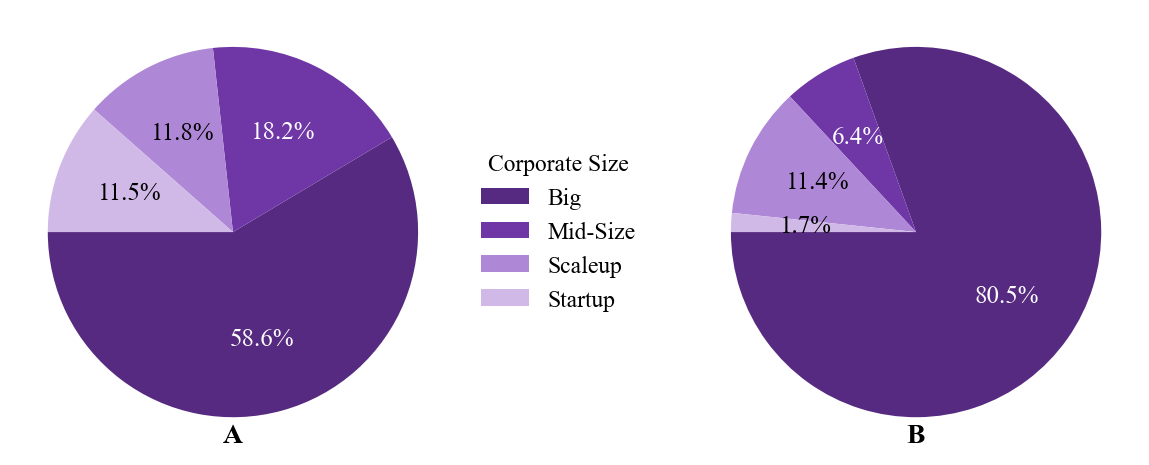

In [48]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='C:/Windows/Fonts/times.ttf') 
plt.rcParams['font.family'] = prop.get_name()
#colors = ["#7339AC", "#8C53C6", "#A679D2", "#BF9FDF"]
colors = ["#562A81", "#6F37A6", "#AF87D7", "#D0B9E7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
#colors = sns.color_palette("Paired")A
# Create a figure with two subplots
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

# Plot the pie chart for company distribution
wedges1, texts1, autotexts1 = ax[0].pie(company_percentages.values(), labels=None, autopct='%1.1f%%', startangle=180)

autotexts1[0].set_color('white')
autotexts1[1].set_color('white')


# Plot the pie chart for paper distribution
wedges2, texts2, autotexts2 = ax[1].pie(paper_percentages.values(), labels=None, autopct='%1.1f%%', startangle=180, explode=(0, 0, 0,0))

autotexts2[0].set_color('white')
autotexts2[1].set_color('white')

# Add legend
plt.legend([key.title() for key in company_percentages.keys()], loc='center left', bbox_to_anchor=(-0.485, 0, 0.5, 1), edgecolor='#D9D9D9', frameon=False, fontsize=17, title="Corporate Size", title_fontsize=17)
ax[0].text(0.5, 0.06, "A", fontsize=20, fontweight='bold', ha='center', va='center', transform=ax[0].transAxes)
ax[1].text(0.5, 0.06, "B", fontsize=20, fontweight='bold', ha='center', va='center', transform=ax[1].transAxes)


plt.tight_layout()
# plt.show()
plt.savefig("pie_charts.png", dpi=300)